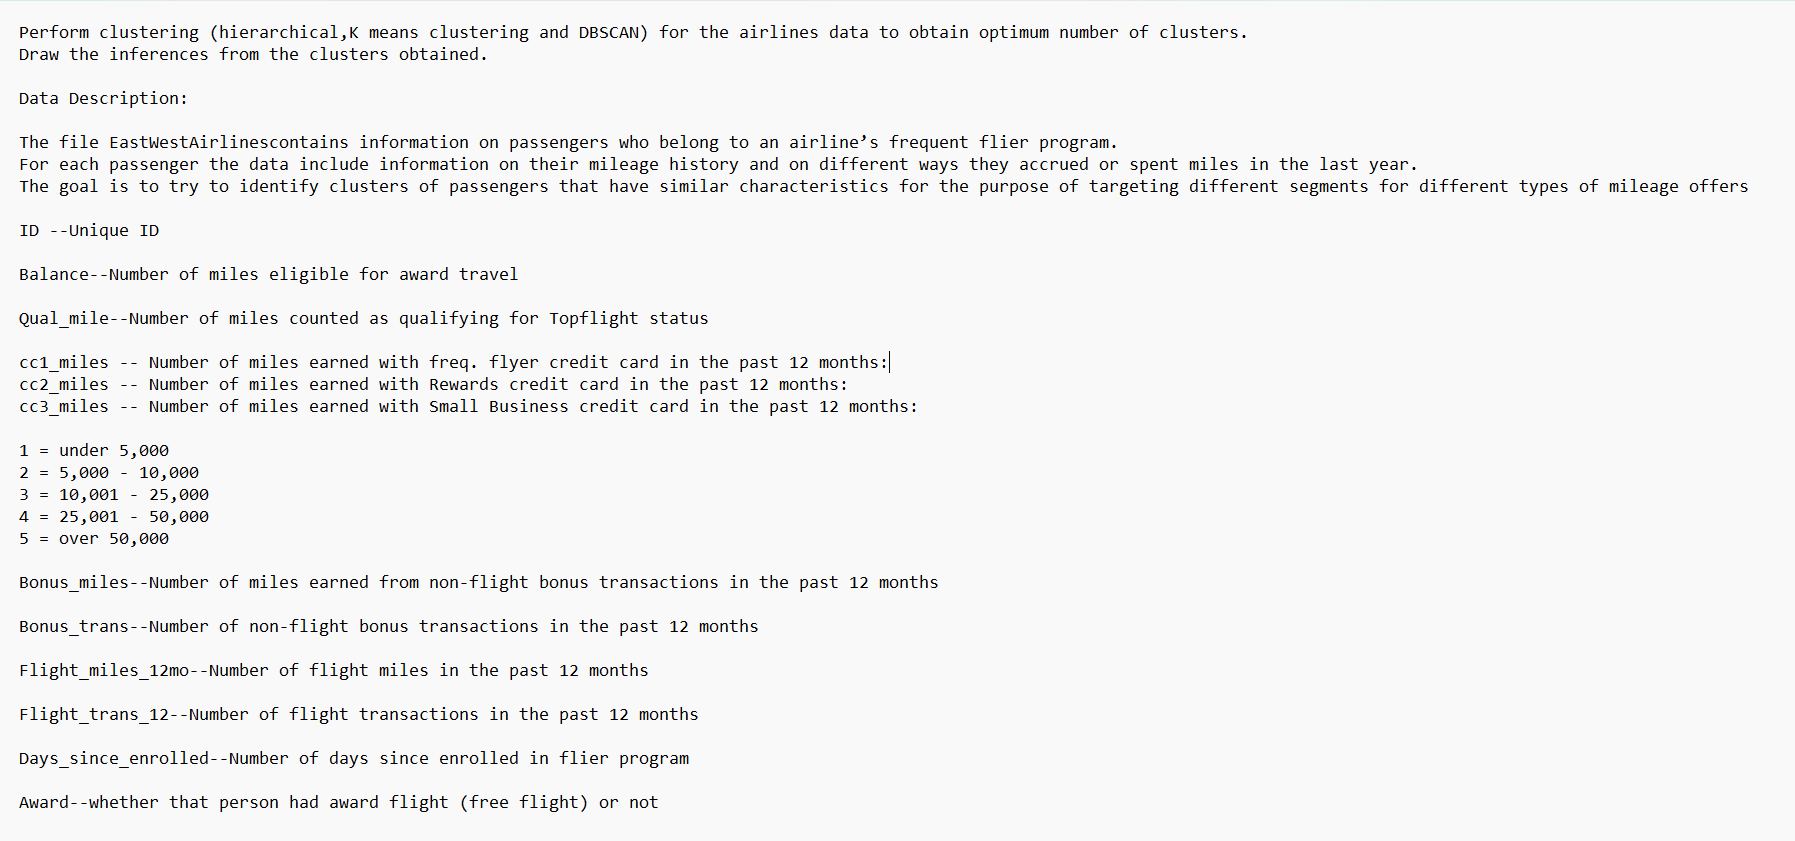

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
airlines = pd.read_csv('EastWestAirlines.csv')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#Renamng Column
airlines = airlines.rename({'ID#':'ID','Award?':'Award'},axis=1)
airlines.head()


#Set ID as Index Column
airlines.set_index('ID',inplace=True)
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [5]:
#Droping 1st Column
airlines = airlines

In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


## EDA

In [7]:
# Checking Null Values

airlines.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

No Null values in dataset

In [8]:
# Checking Duplicate Values

airlines[airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


As we can see there are no duplicate values in dataset

In [9]:
# Correlation

airlines.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


### Visualizing Data

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D

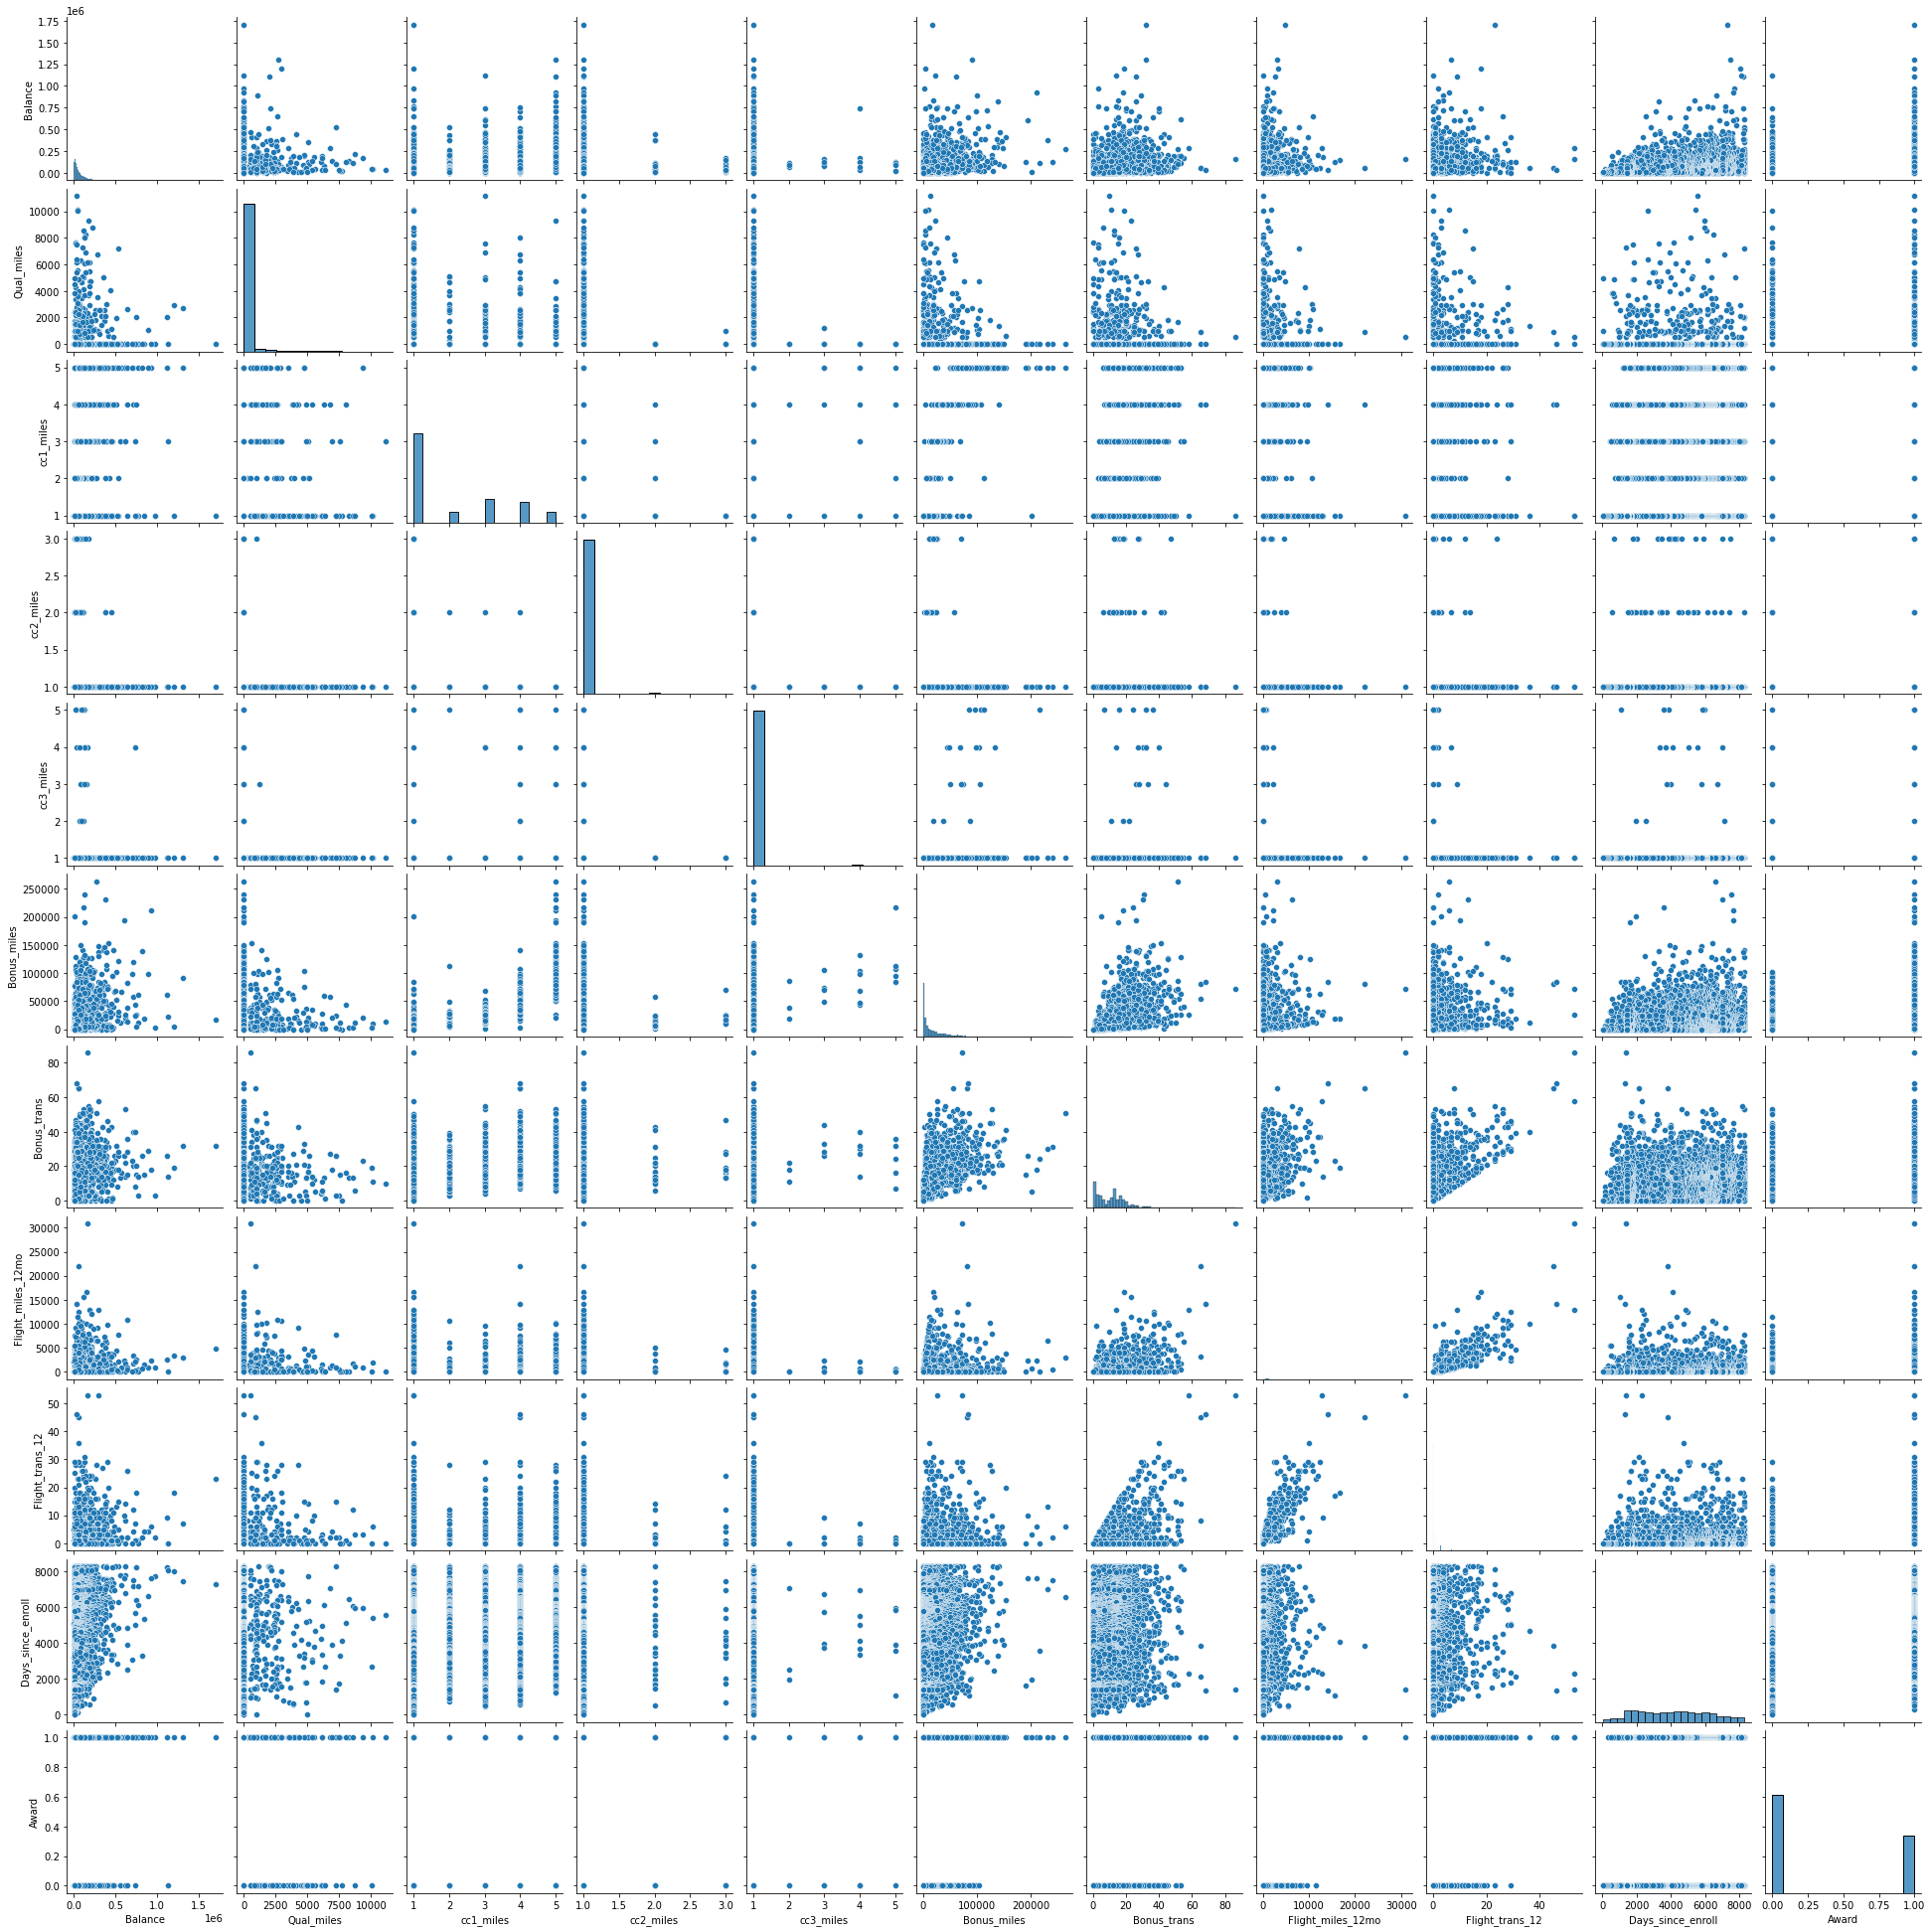

In [11]:
sns.pairplot(airlines)
plt.show()

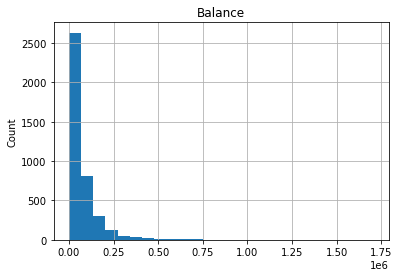

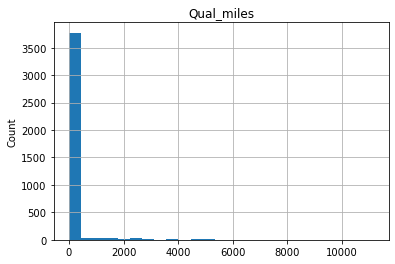

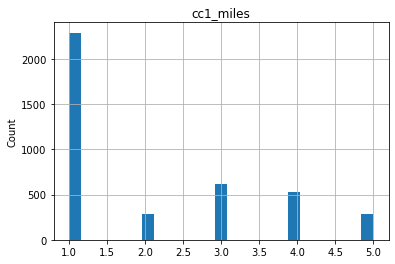

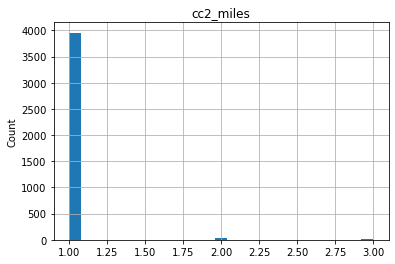

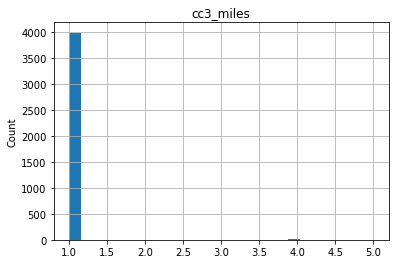

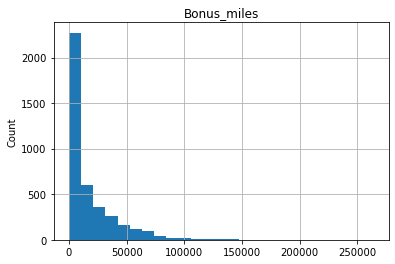

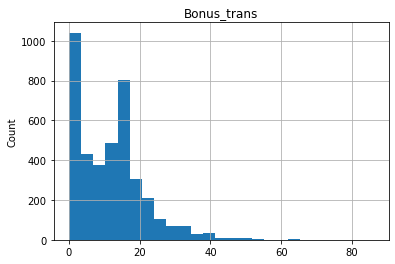

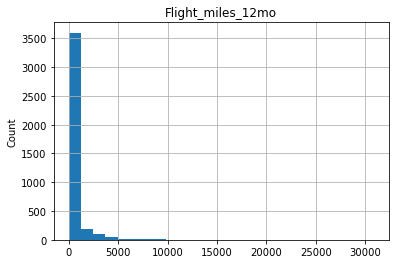

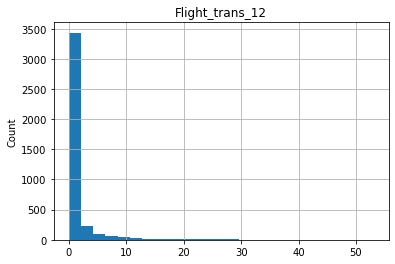

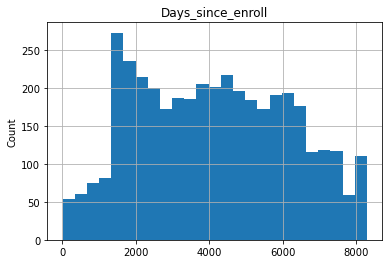

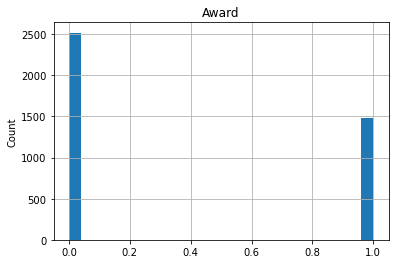

In [12]:
for feature in airlines.columns:
    data=airlines.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

#### Outlier Detection


In [13]:
airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

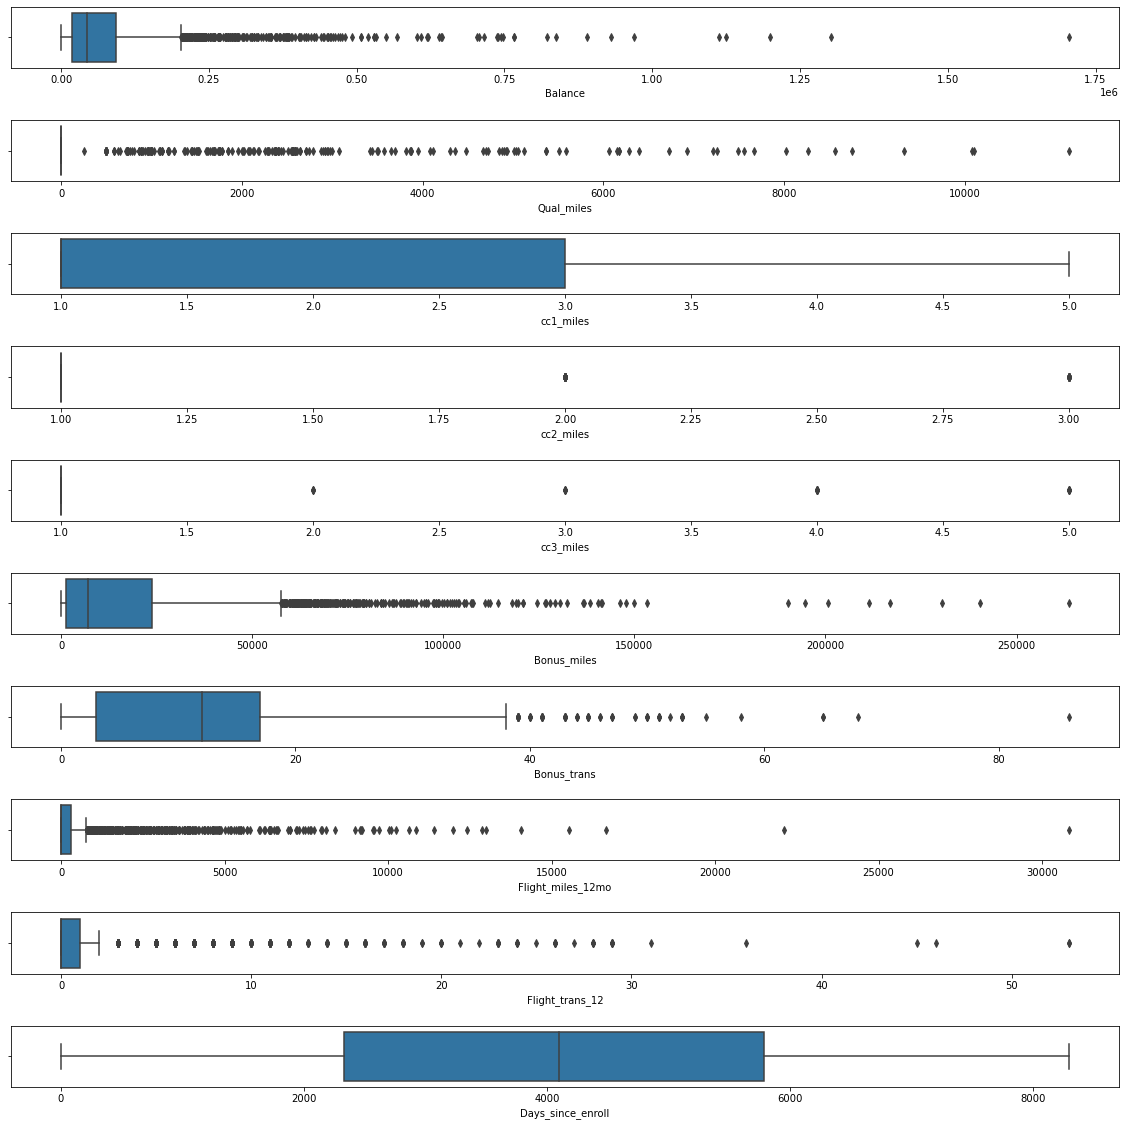

In [14]:
ot = airlines

fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)

sns.boxplot(x='Balance', data=ot, ax=axes[0])
sns.boxplot(x='Qual_miles', data=ot, ax=axes[1])
sns.boxplot(x='cc1_miles', data=ot, ax=axes[2])
sns.boxplot(x='cc2_miles', data=ot, ax=axes[3])
sns.boxplot(x='cc3_miles', data=ot, ax=axes[4])
sns.boxplot(x='Bonus_miles', data=ot, ax=axes[5])
sns.boxplot(x='Bonus_trans', data=ot, ax=axes[6])
sns.boxplot(x='Flight_miles_12mo', data=ot, ax=axes[7])
sns.boxplot(x='Flight_trans_12', data=ot, ax=axes[8])
sns.boxplot(x='Days_since_enroll', data=ot, ax=axes[9])

plt.tight_layout(pad=2.0)

<AxesSubplot:>

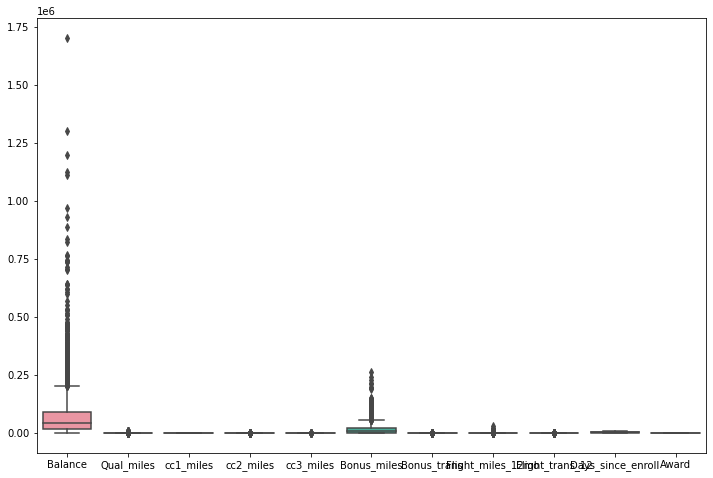

In [15]:
# Box plot for every feature in same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=airlines)

<AxesSubplot:>

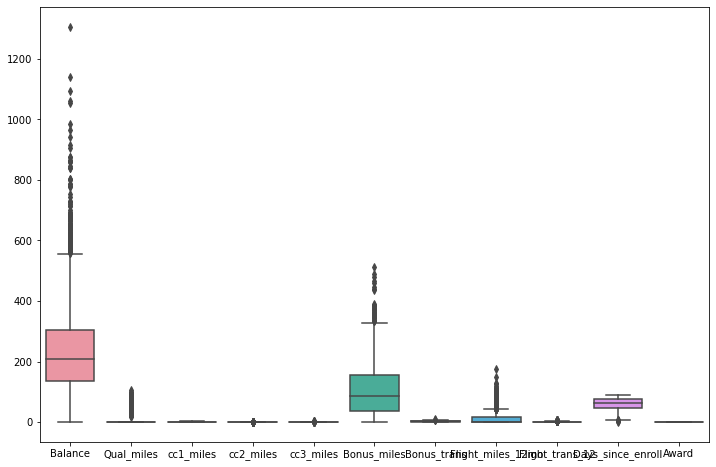

In [16]:
# Using sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(ot))

<AxesSubplot:>

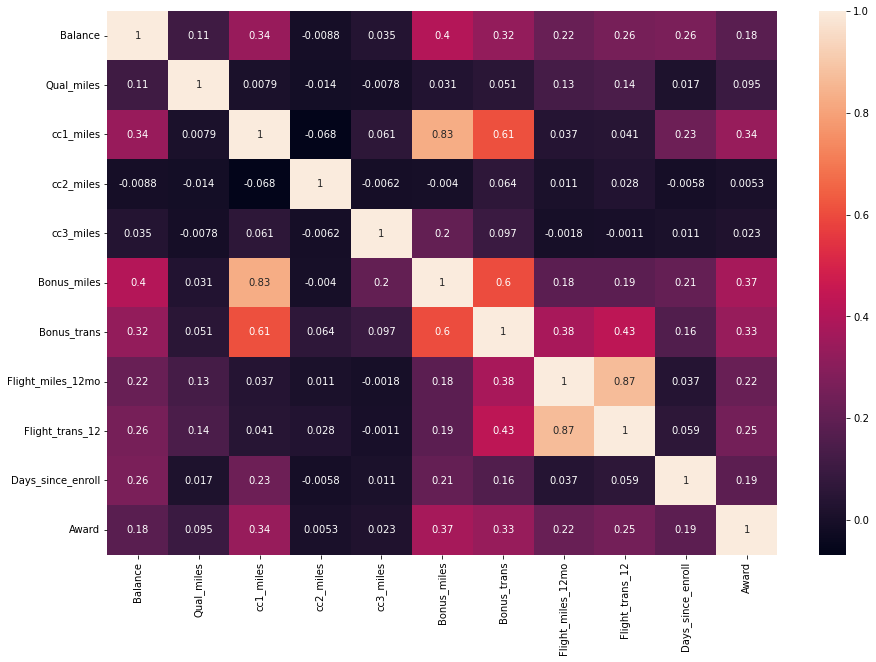

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(airlines.corr(), annot= True)

Correlation matrix

*flight_trans_12 is positively correlated with flight_miles_12mo


*Bonus_miles is positively correlated with cc1_miles


*Bonus_trans is positively correlated with cc1_miles


*Bonus_trans is positively correlated with Bonus_miles

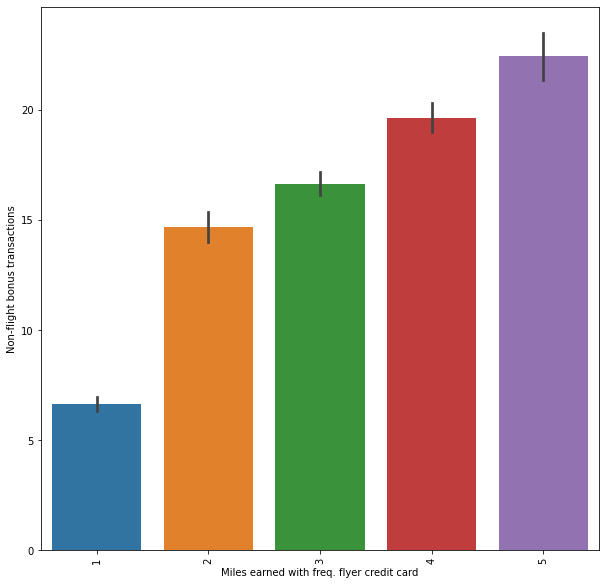

In [18]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans')
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

##### People who fly frequently use bonus transactions more

### Standardization of data

In [19]:
# Standardizing Data

from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler()
std_df = scaler.fit_transform(airlines)
std_df.shape

(3999, 11)

In [20]:
airlines_std = pd.DataFrame(std_df)
airlines_std.columns = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award']
# airlines_std = pd.concat([airlines['ID#'],airlines_std],axis=1)


In [21]:
airlines_std

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [22]:
std_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## WCSS

#### Finding Optimum number of Clusters

In [23]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

In [24]:
wcss

[43989.000000000095,
 35409.51662986136,
 30900.34108916943,
 27161.39895603341,
 24883.727181458307,
 21470.81581002001,
 19502.910888939765,
 17316.82623282265,
 16044.27191900284,
 14727.884740531088]

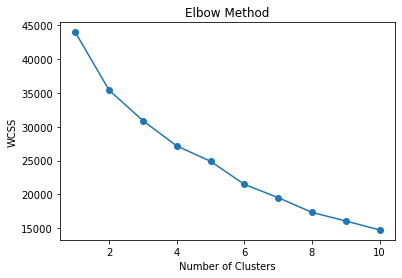

In [25]:
plt.plot(range(1,11), wcss)
plt.scatter(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Slightly change in WCSS value from k=6 to k=7

So, Number of Clusters that is k=7

In [26]:
X = std_df
km = KMeans(n_clusters=7)
y_means = km.fit_predict(X)

y_means.shape

(3999,)

In [27]:
y_means

array([0, 0, 0, ..., 3, 1, 1])

In [28]:
km.labels_

array([0, 0, 0, ..., 3, 1, 1])

In [29]:
# Cluster centres associated with each labels

km.cluster_centers_

array([[-1.40638280e-01, -1.06506924e-01, -5.05342516e-01,
        -9.82418871e-02, -5.85505128e-02, -4.59807088e-01,
        -3.60953761e-01, -1.38754854e-01, -1.48632145e-01,
         7.81108111e-01, -1.55042223e-01],
       [-3.67347779e-01, -1.39313448e-01, -5.73308353e-01,
        -9.82418871e-02, -6.27665798e-02, -5.09520214e-01,
        -5.02048368e-01, -2.09709421e-01, -2.28057918e-01,
        -9.21725469e-01, -4.70676483e-01],
       [ 1.16052271e+00,  4.36020719e-01,  1.67307550e-01,
        -9.82418871e-02, -6.27665798e-02,  6.94407196e-01,
         1.77785138e+00,  3.79919478e+00,  4.09529133e+00,
         2.76357234e-01,  8.83748240e-01],
       [ 4.69839654e-01, -1.12402786e-01,  1.32429420e+00,
        -9.82418871e-02, -5.33067064e-02,  1.06316276e+00,
         7.95907634e-01, -7.21017876e-02, -8.17047594e-02,
         3.24476957e-01,  6.63354403e-01],
       [ 4.45857477e-01,  6.90583543e+00, -5.65880291e-03,
        -9.82418871e-02, -6.27665798e-02,  9.28299907e-02,
  

In [30]:
km.inertia_

19165.861458655592

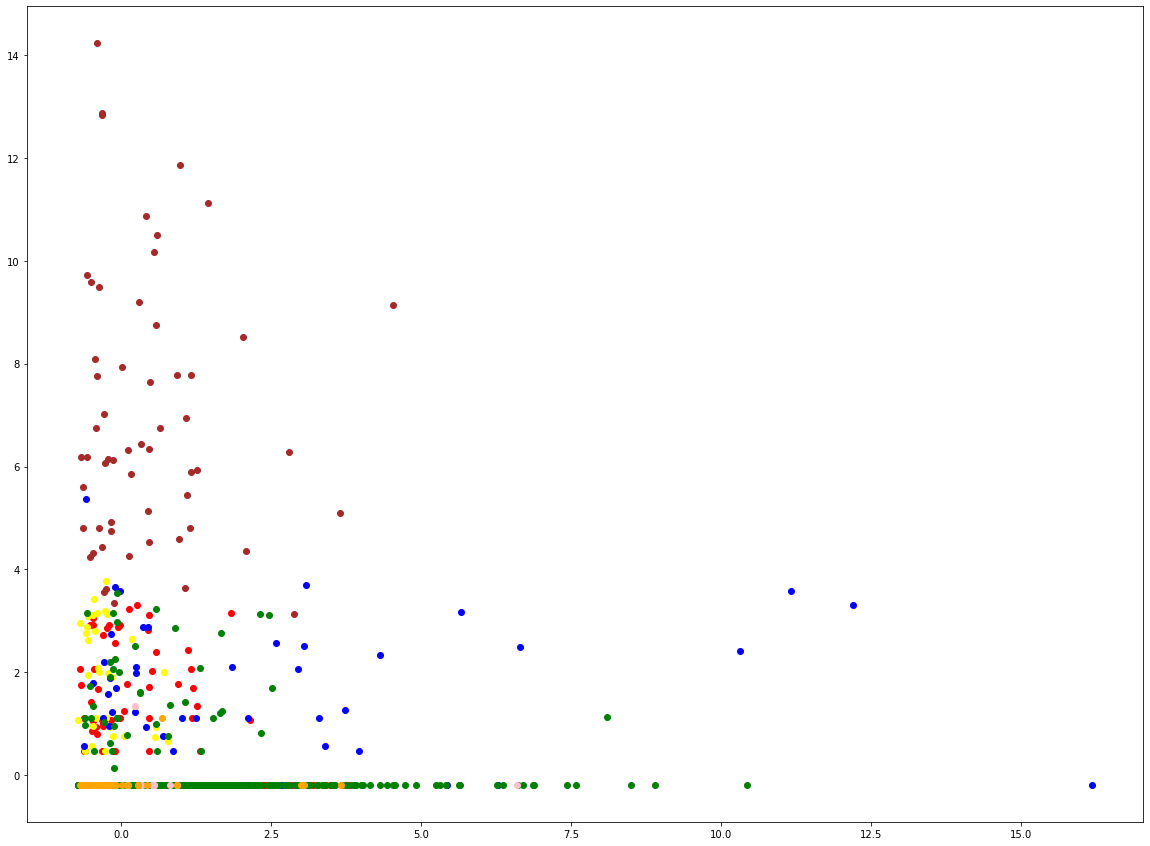

In [31]:
plt.figure(figsize=(20,15))
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='yellow')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='blue')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='green')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='brown')
plt.scatter(X[y_means == 5,0],X[y_means == 5,1],color='pink')
plt.scatter(X[y_means == 6,0],X[y_means == 6,1],color='orange')


In [32]:
airlines_std['y_means']=y_means
airlines_std.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,y_means
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,3


In [33]:
# Assign Clusters to DataSet

y_means_centers = airlines_std.groupby('y_means').agg(['mean']).reset_index()
y_means_centers

,y_means,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,-0.140638,-0.106507,-0.505343,-0.098242,-0.058551,-0.459807,-0.360954,-0.138755,-0.148632,0.781108,-0.155042
1,1,-0.367348,-0.139313,-0.573308,-0.098242,-0.062767,-0.509520,-0.502048,-0.209709,-0.228058,-0.921725,-0.470676
2,2,1.160523,0.436021,0.167308,-0.098242,-0.062767,0.694407,1.777851,3.799195,4.095291,0.276357,0.883748
3,3,0.469840,-0.112403,1.324294,-0.098242,-0.053307,1.063163,0.795908,-0.072102,-0.081705,0.324477,0.663354
4,4,0.445857,6.905835,-0.005659,-0.098242,-0.062767,0.092830,0.093527,0.371897,0.406096,-0.092027,0.375612
5,5,0.639719,-0.084433,1.022084,-0.098242,15.646299,3.179691,1.714614,0.033293,0.059695,0.239873,0.337527
6,6,-0.046890,-0.156236,-0.668227,9.038254,-0.062767,-0.101665,0.617851,0.087549,0.220347,-0.072464,0.051784


In [34]:
# sns.pairplot(airlines_std)

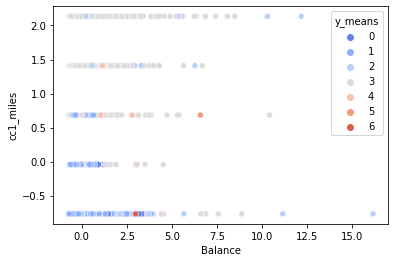

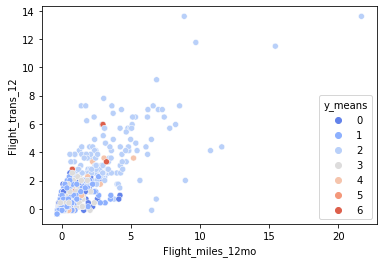

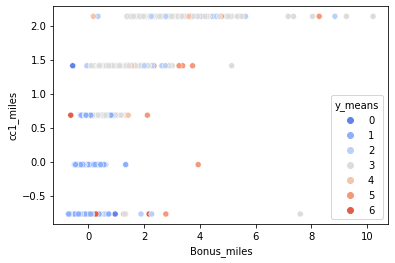

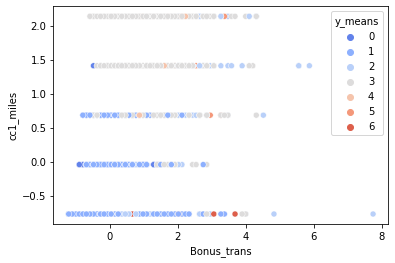

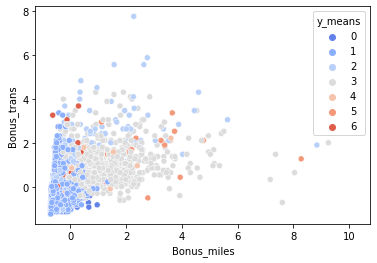

In [35]:
sns.scatterplot(x='Balance', y='cc1_miles', data = airlines_std, hue='y_means',palette=sns.color_palette('coolwarm', n_colors=7))
plt.show()
sns.scatterplot(x='Flight_miles_12mo', y='Flight_trans_12', data = airlines_std, hue='y_means',palette=sns.color_palette('coolwarm', n_colors=7))
plt.show()
sns.scatterplot(x='Bonus_miles', y='cc1_miles', data = airlines_std, hue='y_means',palette=sns.color_palette('coolwarm', n_colors=7))
plt.show()
sns.scatterplot(x='Bonus_trans', y='cc1_miles', data = airlines_std, hue='y_means',palette=sns.color_palette('coolwarm', n_colors=7))
plt.show()
sns.scatterplot(x='Bonus_miles', y='Bonus_trans', data = airlines_std, hue='y_means',palette=sns.color_palette('coolwarm', n_colors=7))
plt.show()

## DBSCAN

In [36]:
airlines_1 = pd.read_csv('EastWestAirlines.csv')

#Renamng Column
airlines_1 = airlines_1.rename({'ID#':'ID','Award?':'Award'},axis=1)
airlines_1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [37]:
# Standardizing Data

scaler=StandardScaler()
std_df1 = scaler.fit_transform(airlines)
std_df1.shape

(3999, 11)

In [38]:
std_df1

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
y_pred = dbscan.fit_predict(std_df1)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [41]:
cluster = pd.DataFrame(y_pred,columns=['clusters'])

In [42]:
cluster

,clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [44]:
airlines_1 = pd.concat([airlines_1,cluster],axis=1)
airlines_1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


## Hierarchical Clustering

In [45]:
airlines_2 = pd.read_csv('EastWestAirlines.csv')

# Renaming columns

airlines_2 = airlines_2.rename({'ID#':'ID','Award?':'Award'},axis=1)
airlines_2

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Normalization Of Data

In [46]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit_transform(airlines_2.iloc[:,1:])
airlines_n = pd.DataFrame(norm)
airlines_n.columns = ['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']
airlines_n = pd.concat([airlines_2['ID'],airlines_n],axis=1)
airlines_n.head()


# def norm_func(i):
#     x = (i-i.min())/(i.max()-i.min())
#     return (x)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [47]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

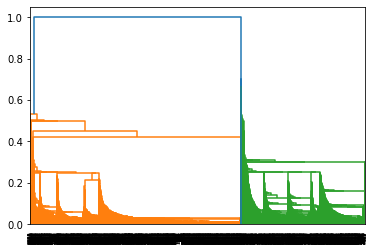

In [48]:
# Creating Dendrogram

dendrogram = sch.dendrogram(sch.linkage(airlines_n.iloc[:,1:], method='single'))

In [49]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [50]:
y_hc = hc.fit_predict(airlines_n.iloc[:,1:])
Clusters = pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [51]:
airlines_n['h_clusterid'] = hc.labels_
hc.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [52]:
# Assign Cluster to dataset

airlines_n.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
